<a href="https://www.kaggle.com/code/aureliomerenda/no-sweeties-data-analysis-from-streaks-app?scriptVersionId=223413491" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# "No sweeties": data analysis from Streaks app

This projects analyzes data from the [Streaks app](https://streaksapp.com/), which I use to track good habits.

In this case, my good habit was *avoiding treats* (or at least eating as few as possible 😅).

## Premises

Before diving into the data analysis, it's important to explain how Streaks tracks this particular habit.

The app categorizes it as a *negative goal*, meaning that every day, if no action is taken, the habit is automatically marked as completed (i.e., I didn’t eat sweet treats). However, if I break the habit, I must manually log it as missed (i.e., I ate sweet treats).

## Preliminary analysis

I exported the CSV file from the Streaks app and saved it as `sweeties_streak_data.csv` without modifications.

Let's begin by importing the `pandas` library and loading the dataset.

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/d/aureliomerenda/streak-app-data-for-do-not-eat-sweeties-goal/sweeties_streak_data.csv")

We’ll start by gathering some general information about the data.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   task_id          618 non-null    object 
 1   title            618 non-null    object 
 2   icon             618 non-null    object 
 3   entry_type       618 non-null    object 
 4   entry_date       618 non-null    int64  
 5   entry_timestamp  615 non-null    object 
 6   entry_timezone   615 non-null    object 
 7   quantity         615 non-null    float64
 8   page             618 non-null    int64  
 9   notes            0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 48.4+ KB


Let me fill null values with `0` to avoid errors later:

In [3]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   task_id          618 non-null    object 
 1   title            618 non-null    object 
 2   icon             618 non-null    object 
 3   entry_type       618 non-null    object 
 4   entry_date       618 non-null    int64  
 5   entry_timestamp  618 non-null    object 
 6   entry_timezone   618 non-null    object 
 7   quantity         618 non-null    float64
 8   page             618 non-null    int64  
 9   notes            618 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 48.4+ KB


First, let's check the number of records.

In [4]:
print("We have {} records".format(df.shape[0]))

We have 618 records


Since we're analyzing a single year (2024), the dataset should contain 366 entries. 

However, if there's any discrepancy, we'll need to investigate further in the [Data Wrangling](#data-wrangling) section.

### Data Types

Let's examine the first five rows to understand the dataset's contents:

In [5]:
df.head()

,task_id,title,icon,entry_type,entry_date,entry_timestamp,entry_timezone,quantity,page,notes
0,8D68E0F2-6B1C-4CA4-89CA-0751FE5D2CA5,Don’t Eat Sweeties,ic_cupcake,completed_auto,20230606,2023-06-06T22:25:40Z,Europe/Rome,0.0,2,0.0
1,8D68E0F2-6B1C-4CA4-89CA-0751FE5D2CA5,Don’t Eat Sweeties,ic_cupcake,completed_auto,20230607,2023-06-08T06:07:17Z,Europe/Rome,0.0,2,0.0
2,8D68E0F2-6B1C-4CA4-89CA-0751FE5D2CA5,Don’t Eat Sweeties,ic_cupcake,completed_auto,20230608,2023-06-09T09:54:59Z,Europe/Rome,0.0,2,0.0
3,8D68E0F2-6B1C-4CA4-89CA-0751FE5D2CA5,Don’t Eat Sweeties,ic_cupcake,missed_manually,20230609,2023-06-09T20:43:54Z,Europe/Rome,0.0,2,0.0
4,8D68E0F2-6B1C-4CA4-89CA-0751FE5D2CA5,Don’t Eat Sweeties,ic_cupcake,missed_manually,20230610,2023-06-10T15:15:19Z,Europe/Rome,0.0,2,0.0


Before making final assessments of the dataset columns, we can review the values for `title`, `icon`, `entry_type`, `quantity`, and `page`.

In [6]:
print("The values for 'title' are: {}".format(df["title"].unique()))
print("The values for 'icon' are: {}".format(df["icon"].unique()))
print("The values for 'entry_type' are: {}".format(df["entry_type"].unique()))
print("The values for 'quantity' are: {}".format(df["quantity"].unique()))
print("The values for 'page' are: {}".format(df["page"].unique()))

The values for 'title' are: ['Don’t Eat Sweeties']
The values for 'icon' are: ['ic_cupcake']
The values for 'entry_type' are: ['completed_auto' 'missed_manually' 'completed_manually']
The values for 'quantity' are: [0.]
The values for 'page' are: [2]


In summary, we can conclude that:

- the columns `task_id`, `title`, `icon`, `entry_timezone`, `quantity`, `page`, and `notes` are likely unnecessary for our analysis;
- `entry_date` should represent the day when the entry was recorded
- `entry_type` indicates the nature of the record:
  - `completed_auto` and `completed_manually` indicates that I didn't eat sweeties in that day and I completed my good habit;
  - `missed_manually` indicates that I ate sweeties in that day and I missed my goal.

To recap, we just need 2 columns: `entry_date` and `entry_type`.

We know that the type of `entry_type` is string, but what is the type of `entry_date` column?

In [7]:
df["entry_date"].dtype

dtype('int64')

Ok, they are integers.

Some examples of data for this column:

In [8]:
df["entry_date"].head()

0    20230606
1    20230607
2    20230608
3    20230609
4    20230610
Name: entry_date, dtype: int64

Probably we should convert these integers to dates (e.g. `20230607` should be *7th June 2023*)

### Missing values

To assess missing values, we check for null values in each column:

In [9]:
print(
    "We have {} missing values for 'entry_type'".format(df["entry_type"].isna().sum())
)
print(
    "We have {} missing values for 'entry_date'".format(df["entry_date"].isna().sum())
)

We have 0 missing values for 'entry_type'
We have 0 missing values for 'entry_date'


Ok, we are lucky and we have not missing values for these 2 columns!

### Recap

We have a dataset with 618 records:
- we need to filter the dataset to a single year (2024), probably composed by 366 entries;
- we just need 2 columns:
  - `entry_type` that can be 
    - `completed_auto` or `completed_manually` if I did not eat sweeties that day;
    - `missed_manually` if I ate sweeties that day;
  - `entry_date` that contains the date of the record, but is an integer, so we should convert it to a date; 
- we do not have missing values for the 2 columns mentioned above. 

## Data Wrangling

### Filtering columns

We need to filter the dataset with the columns we need (`entry_type` and `entry_date`):

In [10]:
# Filter the columns "entry_type" and "entry_date" in, removing the other ones
df = df[["entry_type", "entry_date"]]
df.head()

,entry_type,entry_date
0,completed_auto,20230606
1,completed_auto,20230607
2,completed_auto,20230608
3,missed_manually,20230609
4,missed_manually,20230610


We can create a new Boolean column `is_completed` that
- it is `True` if `entry_type` is `completed_auto` or `completed_manually`;
- it is `False` if `entry_type` is `missed_manually`.

In [11]:
# Create new column "is_completed" which is True if "entry_type" is "completed_auto" or "completed_manually"
df["is_completed"] = df["entry_type"].isin(["completed_auto", "completed_manually"])
df.head()

,entry_type,entry_date,is_completed
0,completed_auto,20230606,True
1,completed_auto,20230607,True
2,completed_auto,20230608,True
3,missed_manually,20230609,False
4,missed_manually,20230610,False


We have to convert `entry_date` from String to Date and we can use Pandas method [`to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

We need to pass the `format` argument to define the format of the raw data.

In this case the raw data contains something like `20230607` for the 7th June 2023, so the format is:
- 4 digits for the year;
- 2 digits for the month;
- 2 digits for the day.

Taking a look at [Python datetime format code](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) the format should be `%Y%m%d` where `%Y` is 4-digits year, `%m` is 2-digits month, `%d` is 2-digits day.

We can create a new column for the date, just to compare it with the raw data:

In [12]:
# Create new column "date" of time datetime
df["date"] = pd.to_datetime(df["entry_date"], format="%Y%m%d")
df.head()

,entry_type,entry_date,is_completed,date
0,completed_auto,20230606,True,2023-06-06
1,completed_auto,20230607,True,2023-06-07
2,completed_auto,20230608,True,2023-06-08
3,missed_manually,20230609,False,2023-06-09
4,missed_manually,20230610,False,2023-06-10


Comparing `entry_date` and `date` it seems that the convertion has been successful.

We can proceed to remove old columns `entry_type` and `entry_date`:

In [13]:
# Remove "entry_type" and "entry_date" columns
df = df.drop(["entry_type", "entry_date"], axis=1)
df.head()

,is_completed,date
0,True,2023-06-06
1,True,2023-06-07
2,True,2023-06-08
3,False,2023-06-09
4,False,2023-06-10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   is_completed  618 non-null    bool          
 1   date          618 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1)
memory usage: 5.6 KB


### Filtering entries

As we have seen in the section below, the dataset contains 618 records while we need data just for one year (2024), so we need 366 entries and we have 252 extra entries, probably relative to previous and/or next year.

Before filterind the entries, we can take a look at first and last entries to confirm our hyphotesis:

In [15]:
df.head()

,is_completed,date
0,True,2023-06-06
1,True,2023-06-07
2,True,2023-06-08
3,False,2023-06-09
4,False,2023-06-10


In [16]:
df.tail()

,is_completed,date
613,False,2025-02-08
614,False,2025-02-09
615,True,2025-02-10
616,True,2025-02-11
617,True,2025-02-12


And we can confirm that the dataset starts from June 2023 and ends to February 2025.

So we can proceed to filter it to keep only the year 2024.

We could do it with:

```python
df = df[(df['date'] >= '2024-01-01') & (df['date'] <= '2024-12-31')]
```

but it would have a computation complexity of `O(n)` since it checks every row to filter them.

Considering that the dataset seems already sorted, a more performant solution could be:
- find the index for the start date (1st January 2024) with `searchsorted` which has a complexity of `O(log n)`;
- find the index for the end date (31st December 2024) with `searchsorted` which has a complexity of `O(log n)`;
- slicing the dataset with `iloc` which has a complexity of `O(1)`.

$$O(log_n) + O(log_n) + O(1) = O(log_n)$$

This solution will have a complexity of `O(log n)`, is significantly better than `O(n)`.

So we can proceed:

In [17]:
# Filter 2024 days in
start_idx = df["date"].searchsorted('2024-01-01', side="left")
end_idx = df["date"].searchsorted("2024-12-31", side="right")
df = df.iloc[start_idx:end_idx]

In [18]:
df.shape[0]

366

In [19]:
df.head()

,is_completed,date
209,False,2024-01-01
210,False,2024-01-02
211,True,2024-01-03
212,False,2024-01-04
213,False,2024-01-05


In [20]:
df.tail()

,is_completed,date
570,False,2024-12-27
571,False,2024-12-28
572,False,2024-12-29
573,False,2024-12-30
574,False,2024-12-31


And we have a dataset of 366 entries that includes data only for 2024.

## Data Analysis

It's time to analyze our dataset and answer some questions.

> What is the percentage of days I reached my goal, not eating sweeties?

In [21]:
# Get the number of days where the goal was completed
completed_days = df["is_completed"].sum()

# Get total days
total_days = df.shape[0]

# Calculate the completed goal percentage
completed_percentage = completed_days * 100 // total_days

# Show completed days and their percentage
print(completed_days, completed_percentage)

185 50


I reached my goal and do not eat sweeties for 185 days, the 50% of the total.

> Which months I ate more and less sweeties? 

In [22]:
# Get the month name (January...December) of every record
df["month"] = df["date"].dt.month_name()

# Group by month
months_completed_percentage = (1 - df.groupby(["month"])["is_completed"].mean()) * 100

# Sort months by percentage
months_completed_percentage = months_completed_percentage.sort_values(ascending=False)

# Show all
print(months_completed_percentage)

month
April        70.000000
December     64.516129
May          61.290323
August       58.064516
January      51.612903
July         48.387097
February     48.275862
September    46.666667
November     43.333333
June         40.000000
March        32.258065
October      29.032258
Name: is_completed, dtype: float64


I ate more sweeties in April (70%) and less ones in October (29%).

> Which weekdays I ate more and less sweeties? 

In [23]:
# Get the weekday name (Monday...Sunday) of every record
df["weekday"] = df["date"].dt.day_name()

# Group by weekday name
weekday_completed_percentage = (1 - df.groupby(["weekday"])["is_completed"].mean()) * 100

# Sort weekday names by percentage
weekday_completed_percentage = weekday_completed_percentage.sort_values(ascending=False)

# Show all
print(weekday_completed_percentage)

weekday
Saturday     80.769231
Sunday       71.153846
Friday       53.846154
Thursday     48.076923
Wednesday    32.692308
Monday       30.188679
Tuesday      30.188679
Name: is_completed, dtype: float64


I ate more sweeties on Saturday (80%) and less ones on Tuesday (30%).

The weekend is the period when I ate more sweeties, the start of the week less.

> Whick weeks I ate more and less sweeties?

In [24]:
# Get the week number (1...52) of every record
df["week"] = df["date"].dt.isocalendar().week

# Group by week number
weeks = df.groupby(["week"])

# Filter for weeks with 7 days (no partial weeks)
weeks = weeks.filter(lambda week: len(week) == 7)

# Calculate the percentage for every week
weeks_completed_percentage = (
    1 - weeks.groupby(["week"])["is_completed"].mean()
) * 100

# Sort weeks by percentage
weeks_completed_percentage = weeks_completed_percentage.sort_values(ascending=False)

# Show first 5 weeks
print(weeks_completed_percentage.head())

week
52    100.000000
15    100.000000
19     71.428571
34     71.428571
14     71.428571
Name: is_completed, dtype: float64


In [25]:
# Get the week with more sweeties
(more_sweeties_week_week) = weeks_completed_percentage.index[0]
more_sweeties_week = df[
    (df["week"] == more_sweeties_week_week)
]

# Get the dates for the week with more sweeties
more_sweeties_week_start = more_sweeties_week.iloc[0]["date"]
more_sweeties_week_end = more_sweeties_week.iloc[-1]["date"]

# Print the week dates with more sweeties
print(
    "I ate more sweeties in the week from {} to {} ({}%)".format(
        more_sweeties_week_start.strftime("%-d %B %Y"),
        more_sweeties_week_end.strftime("%-d %B %Y"),
        weeks_completed_percentage.iloc[0],
    )
)

I ate more sweeties in the week from 23 December 2024 to 29 December 2024 (100.0%)


In [26]:
# Get the week with less sweeties
(less_sweeties_week_week) = weeks_completed_percentage.index[-1]
less_sweeties_week = df[
    (df["week"] == less_sweeties_week_week)
]

# Get the dates for the week with less sweeties
less_sweeties_week_start = less_sweeties_week.iloc[0]["date"]
less_sweeties_week_end = less_sweeties_week.iloc[-1]["date"]

# Print the week dates with less sweeties
print(
    "I ate less sweeties in the week from {} to {} ({}%)".format(
        less_sweeties_week_start.strftime("%-d %B %Y"),
        less_sweeties_week_end.strftime("%-d %B %Y"),
        weeks_completed_percentage.iloc[-1],
    )
)

I ate less sweeties in the week from 10 June 2024 to 16 June 2024 (14.28571428571429%)


## Data Visualization

We use **MatPlotLib** to show charts about the dataset.

We start importing it:

In [27]:
import matplotlib.pyplot as plt

### Bar chart by month

We will show the bar chart by month, showing the days when we eat more sweeties:

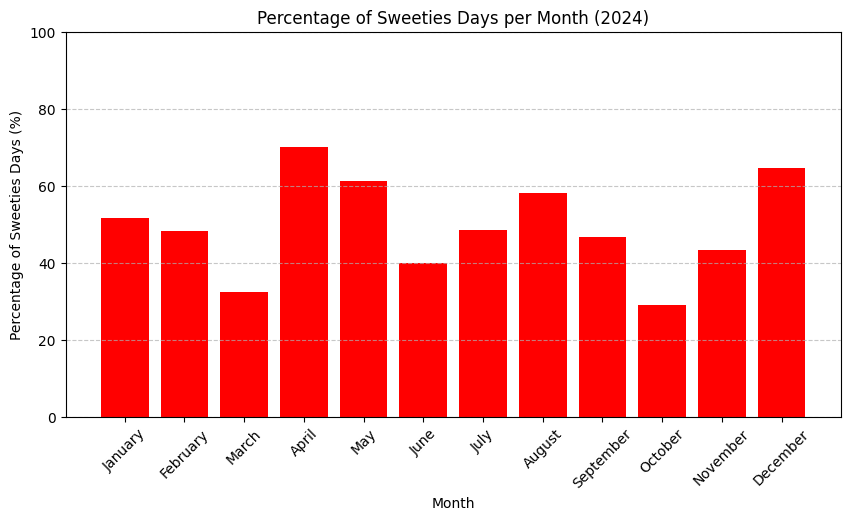

In [28]:
# Extract the month's full name from the date column
df["month"] = df["date"].dt.strftime("%B")

# Count the number of False (when I ate sweeties) per month
monthly_counts = df[df["is_completed"] == False].groupby("month").size()

# Count total days per month
total_days_per_month = df.groupby("month").size()

# Calculate the percentage of sweetie-free days
percentage_sweeties = (monthly_counts / total_days_per_month) * 100

# Ensure all months are included, even if they have 0 total days
all_months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
# And sort them
percentage_sweeties = percentage_sweeties.reindex(all_months, fill_value=0)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(percentage_sweeties.index, percentage_sweeties.values, color="red")

# Customize chart
plt.xlabel("Month")
plt.ylabel("Percentage of Sweeties Days (%)")
plt.title("Percentage of Sweeties Days per Month (2024)")
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to 100% for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Bar chart by weekday

We will show the bar chart by weekday, showing the days when we eat more sweeties:

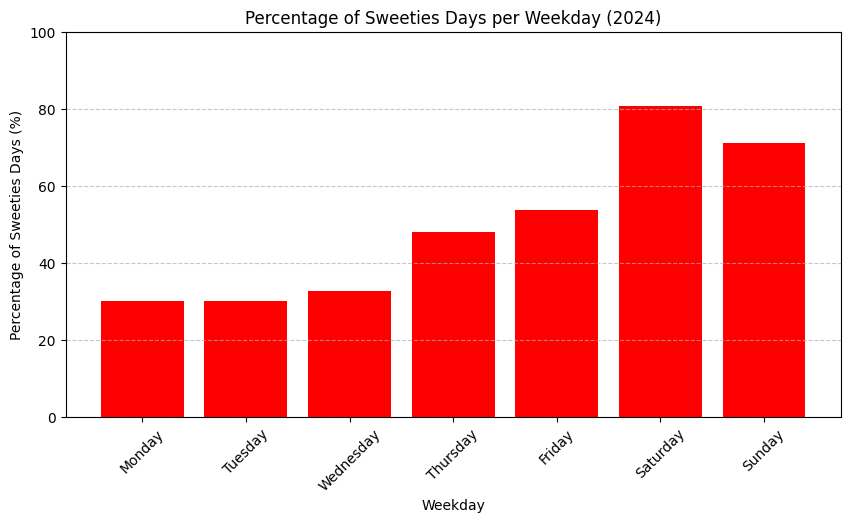

In [29]:
# Extract the weekday name from the date column
df["weekday"] = df["date"].dt.day_name()

# Count the number of False (when I ate sweeties) per weekday
weekly_counts = df[df["is_completed"] == False].groupby("weekday").size()

# Count total days per weekday
total_days_per_weekday = df.groupby("weekday").size()

# Calculate the percentage of sweetie-free days
percentage_sweeties = (weekly_counts / total_days_per_weekday) * 100

# Ensure all weekdays are included, even if they have 0 total days
all_weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]
# And sort them
percentage_sweeties = percentage_sweeties.reindex(all_weekdays, fill_value=0)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(percentage_sweeties.index, percentage_sweeties.values, color="red")

# Customize chart
plt.xlabel("Weekday")
plt.ylabel("Percentage of Sweeties Days (%)")
plt.title("Percentage of Sweeties Days per Weekday (2024)")
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to 100% for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()